**Step 1 Import required libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2 : Loading dataset**

In [ ]:
d=pd.read_csv('/content/Unemployment in India.csv')
d.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


**Step 3: Cleaning data**

In [ ]:
# Remove leading/trailing spaces in column names
d.columns=d.columns.str.strip()

# Check missing values
print(d.isnull().sum())

# Drop missing values
d.dropna(inplace=True)

# Convert Date to datetime
d['Date']=pd.to_datetime(d['Date'])

# Sort by date
d.sort_values('Date', inplace=True)


Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64


/tmp/ipython-input-2771049437.py:11: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  d['Date']=pd.to_datetime(d['Date'])


**Step 4: EDA**

In [ ]:
# Statistical summary
print(d['Estimated Unemployment Rate (%)'].describe())

# Add Year and Month
d['Year']=d['Date'].dt.year
d['Month']=d['Date'].dt.month

count    740.000000
mean      11.787946
std       10.721298
min        0.000000
25%        4.657500
50%        8.350000
75%       15.887500
max       76.740000
Name: Estimated Unemployment Rate (%), dtype: float64


**Step 5: Overall Unemployment Trend**

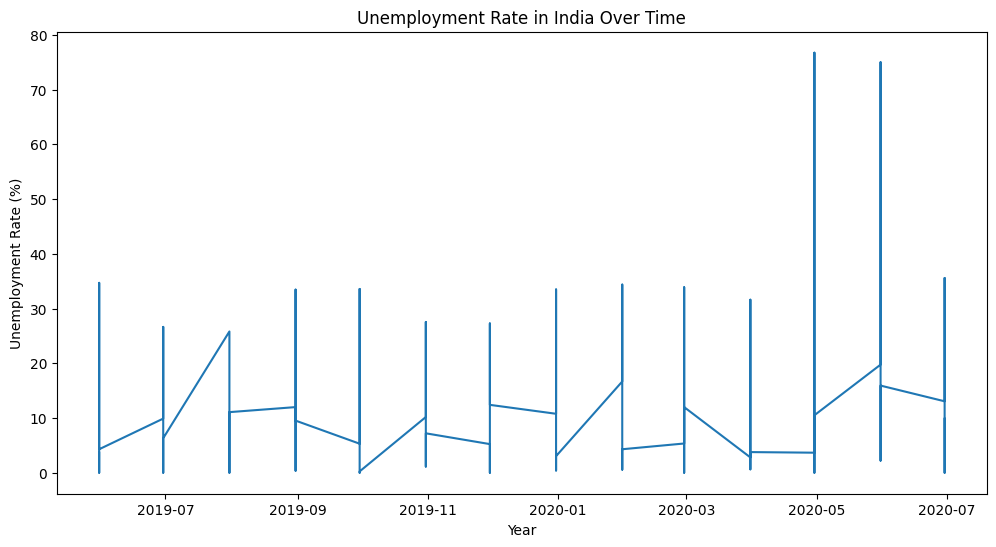

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(d['Date'], d['Estimated Unemployment Rate (%)'])
plt.title("Unemployment Rate in India Over Time")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.show()

Impact of Covid-19 on Unemployment

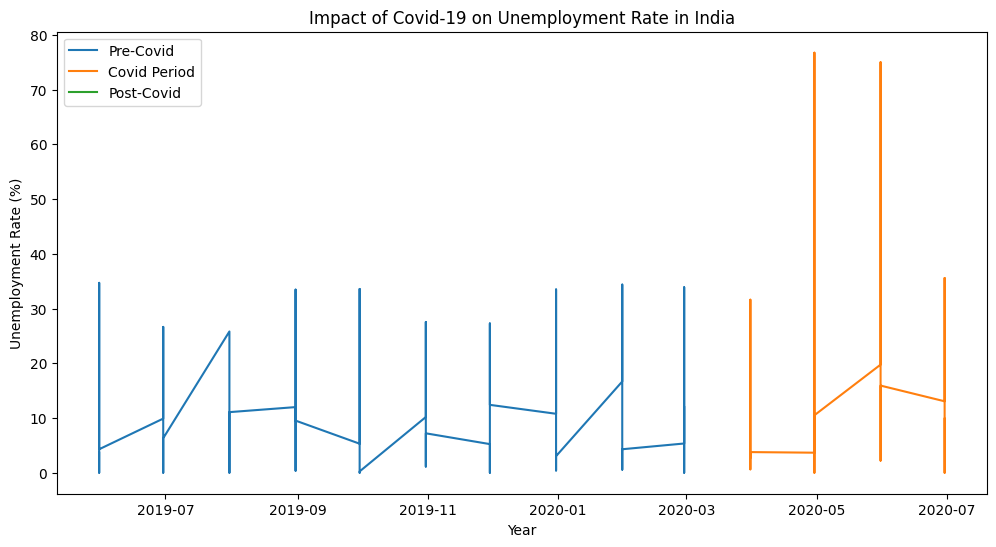

In [ ]:
pre_covid=d[d['Date'] < '2020-03-01']
covid=d[(d['Date'] >= '2020-03-01') & (d['Date'] <= '2021-12-31')]
post_covid=d[d['Date'] > '2021-12-31']

plt.figure(figsize=(12,6))
plt.plot(pre_covid['Date'], pre_covid['Estimated Unemployment Rate (%)'], label="Pre-Covid")
plt.plot(covid['Date'], covid['Estimated Unemployment Rate (%)'], label="Covid Period")
plt.plot(post_covid['Date'], post_covid['Estimated Unemployment Rate (%)'], label="Post-Covid")

plt.title("Impact of Covid-19 on Unemployment Rate in India")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.show()

Year-wise Unemployment Pattern

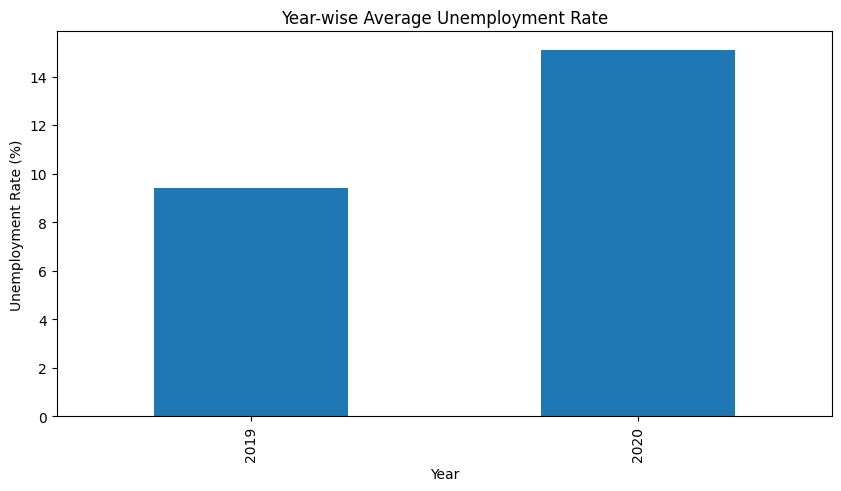

In [ ]:
yearly_avg = d.groupby('Year')['Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(10,5))
yearly_avg.plot(kind='bar')
plt.title("Year-wise Average Unemployment Rate")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.show()

Seasonal Trend

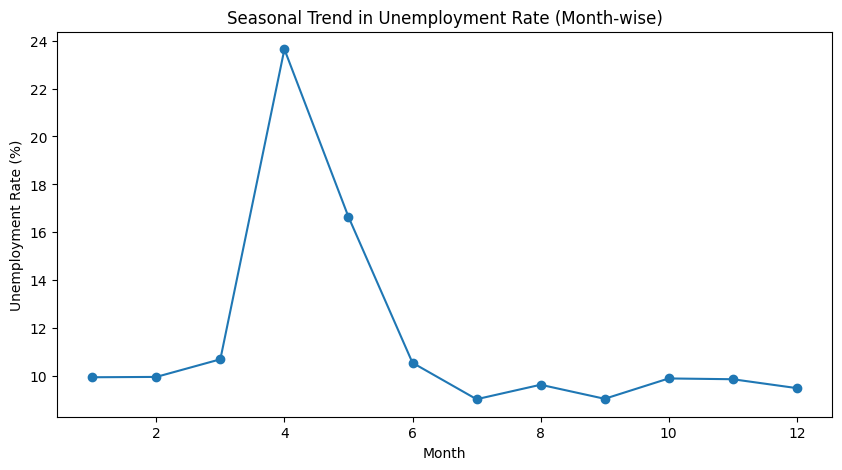

In [ ]:
monthly_avg = d.groupby('Month')['Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(10,5))
monthly_avg.plot(marker='o')
plt.title("Seasonal Trend in Unemployment Rate (Month-wise)")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.show()

Urban vs Rural

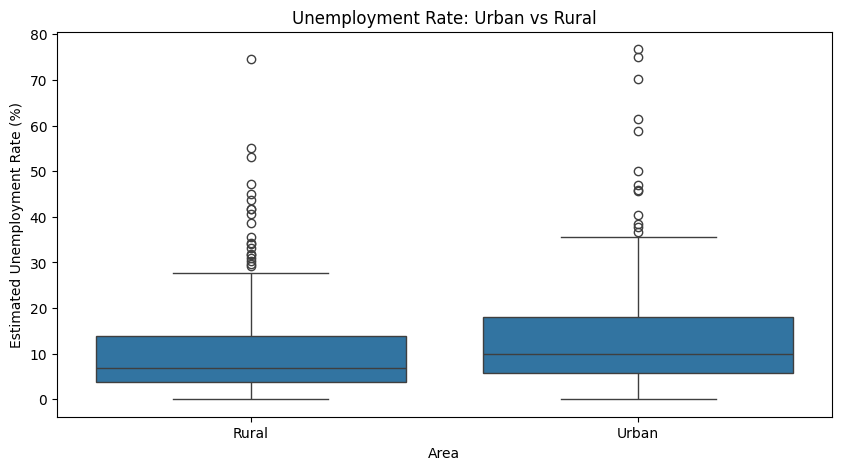

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Area', y='Estimated Unemployment Rate (%)', data=d)
plt.title("Unemployment Rate: Urban vs Rural")
plt.show()

Key takeaways

1. Unemployment rate sharply increased during Covid-19 lockdown (2020).

2. Highest spike observed around April–May 2020.

3. Post-Covid period shows gradual recovery.

4. Seasonal fluctuations are visible across months.

5. Rural and urban areas show different unemployment behavior.